#Pandas数据分析基本操作

In [1]:
cd '/Users/chengang/Desktop/names'

/Users/chengang/Desktop/names


本案例所用公开数据可以在这里下载：[1880-2010全美婴儿姓名频率数据](http://phylab.fudan.edu.cn/lib/exe/fetch.php?media=course:python:names.rar)

In [2]:
import glob,csv

f=open('zong.csv','wb')
m=csv.writer(f)
txts=glob.glob('*.txt')

#读取全部数据文件到一个单一 zong.csv 文件中
for file in txts[:]:
    c_txt = open(file,'rb')
    for line_num, line in enumerate(c_txt):
        if line_num > 0:
            m.writerow(line.strip().split(','))

In [3]:
import pandas as pd
#读入数据并添加names标头, sep注明分隔符为',',encoding的值要与源文件的编码格式一致。
nameAll = pd.read_csv('zong.csv', names= ['name','sex','births'], sep=',', encoding='utf-8') 
nameAll.births.sum()#计算1880-2010全美总出生人数

316679246.0

In [4]:
nameAll.groupby('sex').births.sum()#按性别分组并计算出生人数

sex
F      154266714
M      162412532
Name: births, dtype: float64

In [5]:
years = range(1880,2011)
pieces =[]
columns = names = ['name','sex','births']
for year in years:
    path ='yob%d.txt' % year
    frame = pd.read_csv(path,names=columns)
    frame['year']=year#添加一个例保存year信息
    pieces.append(frame)
names = pd.concat(pieces, ignore_index=True)#concat整合frame到DataFram,ignore_index 忽略原始行号。
names.head()

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [6]:
import numpy as np
total_births = pd.pivot_table(names,index=['year'],values='births',columns='sex',aggfunc=np.sum)
total_births.head()
#names.groupby('sex').births.sum()
#total_births = names.pivot_table('births',rows='years',cols='sex',aggfunc=np.sum)
#DataFrame.pivot_table and crosstab‘s rows and cols keyword arguments were removed in favor of index and columns

sex,F,M
year,,
1880,90993,110493
1881,91955,100748
1882,107851,113687
1883,112322,104632
1884,129021,114445


In [7]:
total_births.plot(title='Total births by sex and year')

Pandas的数据类型：   
Series由pandas.Series或numpy.ndarray创建。   
二维numpy.ndarray
DataFrame由pd.DataFrame(np.random.randn(10,4)，index=range(0,10), columns=list('ABCD'))创建一个十行四列的数据帧。   
结构化的structured arrays

In [8]:
pd.DataFrame(np.random.randn(10,4),index=range(0,10), columns=list('ABCD'))#index 声明索引，columns声明列头。

,A,B,C,D
0,-0.267860,-0.578102,0.098791,-0.241578
1,0.473014,-0.284195,1.230943,-0.173612
2,-0.730406,1.119698,1.604453,0.102000
3,0.410822,-2.198473,-0.105673,0.759595
4,1.446505,-0.590053,-1.359098,-1.012279
5,-0.161761,1.446995,-0.164212,1.057097
6,1.115685,-0.627495,0.053101,0.939972
7,1.848549,0.030325,0.833429,1.926060
8,-0.755210,0.661937,1.050824,0.355890
9,-2.251775,-0.143389,-1.141557,1.972839


DataFrame.index #标识行，index就是每一行数据的id，可以标识每一行的唯一值。   
DataFrame.columns #标识列   
DataFrame.shape #维度   
DateFrame.value #值   
DateFrame.describe() #描述  
DateFrame.count #记数
DateFrame.stack() #堆

In [9]:
names.stack().head()

0  name      Mary
   sex          F
   births    7065
   year      1880
1  name      Anna
dtype: object

In [10]:
names.sort(columns='year',ascending=False).head(3)#Sort根据year列的值来排序，ascending指定倒序。

,name,sex,births,year
1690783,Zzyzx,M,5,2010
1668230,Ashani,F,9,2010
1668216,Arayla,F,9,2010


In [11]:
#Select选取矩阵的第1到5行。有 loc,at,iloc,iat,ix等。
names.iloc[0:5].head(3)

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880


In [12]:
#Select选取矩阵的第2到3列。注意行的选择依然占位。   
names.iloc[:,2:4].head(3)

,births,year
0,7065,1880
1,2604,1880
2,2003,1880


In [13]:
#Select选取矩阵的第1到5行，在选取1到2列。（主意中间是用逗号隔开行参数与列参数）。
names.iloc[0:5,0:2]

,name,sex
0,Mary,F
1,Anna,F
2,Emma,F
3,Elizabeth,F
4,Minnie,F


In [14]:
#Select选取举证的第1，3，4行，在截取第1，3列。
names.iloc[[0,2,3],[0,2]]

,name,births
0,Mary,7065
2,Emma,2003
3,Elizabeth,1939


In [15]:
#DataFrame筛选操作,注意列名是作为一个属性，没有带引号。
names[names.year>2009].head(3)

,name,sex,births,year
1656946,Isabella,F,22731,2010
1656947,Sophia,F,20477,2010
1656948,Emma,F,17179,2010


In [16]:
#与选择，主意圆括号括住&两边的两个条件。
names[(names.year<=2009)&(names.year>2007)].head(3)

,name,sex,births,year
1587338,Emma,F,18765,2008
1587339,Isabella,F,18564,2008
1587340,Emily,F,17397,2008


In [17]:
#用列选择且只返回指定的其他列。
names.iloc[:,[0]][(names.year<=2009)&(names.year>2007)].head(3)

,name
1587338,Emma
1587339,Isabella
1587340,Emily


In [18]:
# 或选择
names[(names.year==2009)|(names.year<2007)].head(3)

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880


In [19]:
#用列选择且只返回指定的其他列。
names.iloc[:,[0]][(names.year<=2009)&(names.year>2007)].head(3)

,name
1587338,Emma
1587339,Isabella
1587340,Emily


In [20]:
#isin返回符合列表参数的数据帧。
names[names['year'].isin([1999,2000])].head(3)

,name,sex,births,year
1303632,Emily,F,26534,1999
1303633,Hannah,F,21662,1999
1303634,Alexis,F,19229,1999


In [21]:
#矩阵相除
y = names[names.year==2000]['sex'].value_counts()
x = names['sex'].value_counts()
per = y/x
per

F    0.017579
M    0.017631
dtype: float64

In [26]:
3#Drop删去第3行。
names.drop(2).head(3)

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
3,Elizabeth,F,1939,1880


In [27]:
#基本运算，并添加到新列。
names['sum']=names['births']+names['year']#（）选行,[]选列。
names.head(3)

,name,sex,births,year,sum
0,Mary,F,7065,1880,8945
1,Anna,F,2604,1880,4484
2,Emma,F,2003,1880,3883


In [28]:
#Groupby利用标识列分组
names.groupby('year').births.sum().plot()

In [29]:
#导出到csv文件，encodeing='utf-8',index=False 去掉pandas索引, sep设定不常见的分隔符如~或`且只能为单字符。
names.to_csv('/Users/chengang/Desktop/names/e.csv', encodeing='utf-8', index=False, sep='`' )

Date
2000-10-02    1436.52002
Name: Open, dtype: float64
                 Close        Open
Date                              
2000-10-02  1436.22998  1436.52002
                 CLOSE        Open
Date                              
2000-10-02  1436.22998  1436.52002
                  Open         High          Low       Close      Volume  \
Date                                                                       
2000-10-02  1436.52002  1445.599976  1429.829956  1436.22998  1051200000   

             Adj Close       H-L  
Date                              
2000-10-02  1436.22998  15.77002  


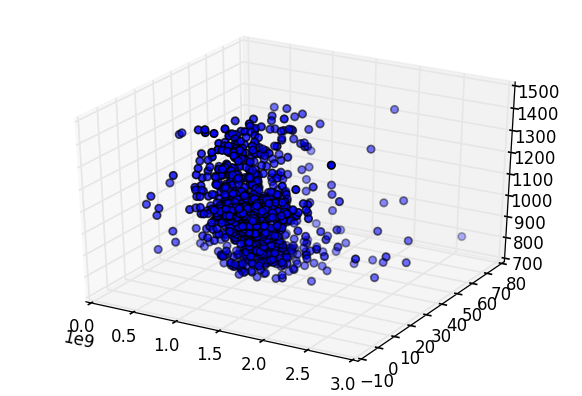

In [31]:
#fetch yahoo data save to csv and open in Pandas!
#from sentdex

%matplotlib inline
import pandas as pd
from pandas import DataFrame
import datetime
import pandas.io.data
import matplotlib.pyplot as plt
sp500 = pd.io.data.get_data_yahoo('%5EGSPC',
                                 start = datetime.datetime(2000,10,1),
                                 end = datetime.datetime(2014,6,11))
sp500.to_csv('sp500_ohlc.csv')

import matplotlib
matplotlib.rcParams['savefig.dpi']=120

df = pd.read_csv('sp500_ohlc.csv',index_col = 'Date',parse_dates=True)

#slice column
df2= df['Open']
print df2.head(1)

#slice colums
df3= df[['Close','Open']]
print df3.head(1)

#rename columns
df4 = df3.rename(columns={'Close':'CLOSE'},inplace=False)
print df4.head(1)

#calcul columns
df['H-L'] = df['High']-df.Low
print df.head(1)

# df['100MA'] = pd.rolling_mean(df['Close'],100)
# df['Difference'] = df['Close'].diff()#??
# print df.head(2)

# df3.plot()
# plt.show()

from mpl_toolkits.mplot3d import Axes3D

td = plt.figure().gca(projection='3d')
td.scatter(df['Volume'].head(1000), df['H-L'].head(1000), df['Close'].head(1000))


## 